# Example of usage Spark OCR original file formatting keeper

## Install spark-ocr python packge
Need specify license and path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""

version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11/"

In [2]:
# install from PYPI using secret
#%pip install spark-ocr==$version+spark30 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

## Initialization of spark session

In [4]:
import os
from pyspark import SparkConf
from sparkocr import start

if license:
    os.environ['SPARK_OCR_LICENSE'] = license

spark = start(jar_path = spark_ocr_jar_path)

spark

Spark version: 3.0.2
Spark NLP version: 3.3.2
Spark OCR version: 3.9.0



## Import OCR transformers

In [5]:
from sparkocr.transformers import *
from sparkocr.enums import *
from pyspark.ml import PipelineModel
from sparkocr.utils import *

## Show original file


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/data/keeplayout/cTDaR_t10025.jpg
    Resolution: 0 dpi
    Width: 1190 px
    Height: 1588 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


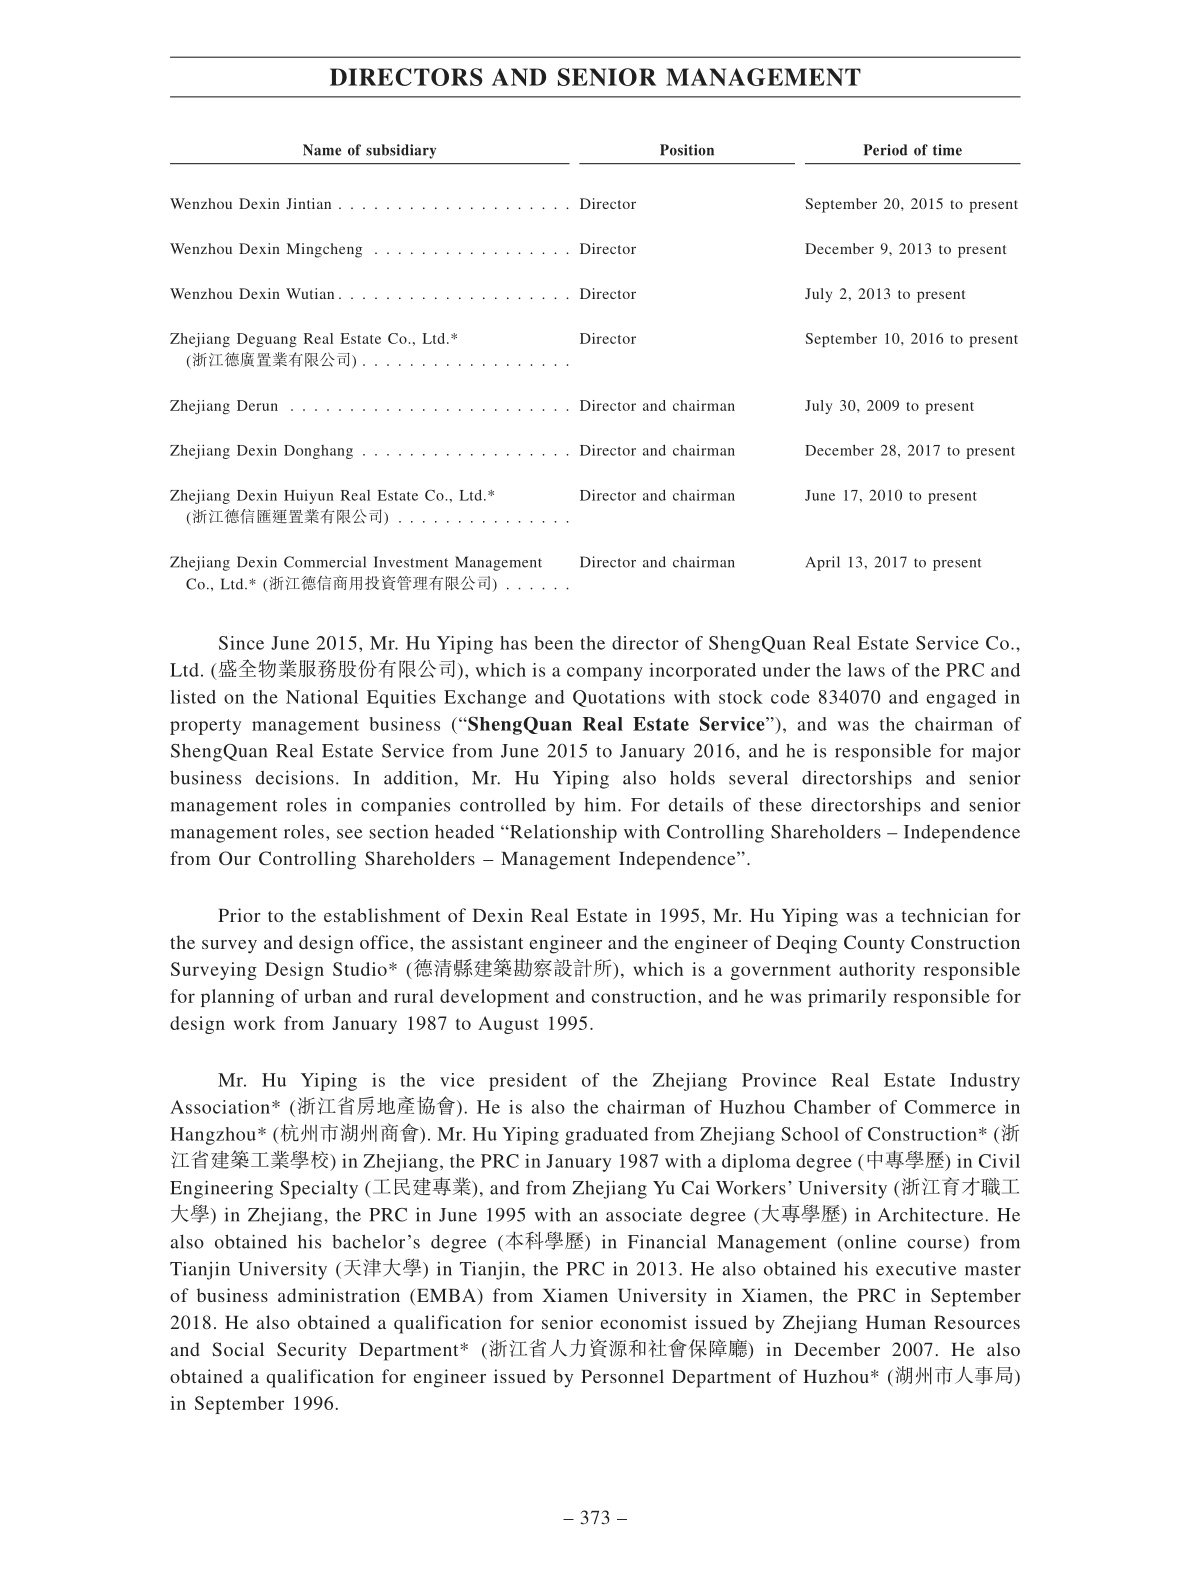

In [6]:
image_raw = spark.read.format("binaryFile").load("data/keeplayout/cTDaR_t10025.jpg").cache()
example_df = BinaryToImage().transform(image_raw)
display_images(example_df)

In [7]:
%%html   
<style type='text/css'>
.CodeMirror{
font-size: 15px;
}

div.output_area pre {
    font-size: 10px;

</style>

## Sample of missing formatting during OCR on image

In [8]:
def pipeline_nolayout():
    skew =  ImageSkewCorrector() \
        .setInputCol("image") \
        .setOutputCol("corrected_image") \
        .setAutomaticSkewCorrection(True)
    
    ocr = ImageToText() \
        .setInputCol("corrected_image") \
        .setOutputCol("text")
    
    pipeline = PipelineModel(stages=[
        skew,
        ocr
    ])
    
    return pipeline

result_bin = pipeline_nolayout().transform(example_df).cache()
print(result_bin.select("text").collect()[0].text)

 

DIRECTORS AND SENIOR MANAGEMENT

 

 

Name of subsidiary Position Period of time
Wenzhou Dexin Jintian.........-...0. Director September 20, 2015 to present
Wenzhou Dexin Mingcheng ............ Director December 9, 2013 to present
Wenzhou Dexin Wutian. 0... ..0.0000. Director July 2, 2013 to present
Zhejiang Deguang Real Estate Co., Ltd.* Director September 10, 2016 to present,

(HTL BALA A)...

Zhejiang Derun .. 2... Director and chairman July 30, 2009 to present
Zhejiang Dexin Donghang............. Director and chairman December 28, 2017 to present
Zhejiang Dexin Huiyun Real Estate Co., Ltd.* Director and chairman June 17, 2010 to present

(HTT MEERA RAST)

Zhejiang Dexin Commercial Investment Management —_Director and chairman April 13, 2017 to present
Co., Ltd. (HALL Ges I Be EIB AG BRS dy

  

Since June 2015, Mr. Hu Yiping has been the director of ShengQuan Real Estate Service Co.,
Ltd. (BE 224) EARS IR A RZ a], which is a company incorporated under the laws of the PRC and
li

## Sample of keeping formatting during OCR on image

In [9]:
def pipeline_keeplayout():
    skew =  ImageSkewCorrector() \
        .setInputCol("image") \
        .setOutputCol("corrected_image") \
        .setAutomaticSkewCorrection(True)

    ocr = ImageToText() \
        .setInputCol("corrected_image") \
        .setOutputCol("text") \
        .setOcrParams(["preserve_interword_spaces=1", ]) \
        .setKeepLayout(True) \
        .setOutputSpaceCharacterWidth(8)
    
    pipeline = PipelineModel(stages=[
        skew,
        ocr
    ])
    
    return pipeline

result2 = pipeline_keeplayout().transform(example_df).cache()
print(result2.select("text").collect()[0].text)

                                                                                                                                                    
                                         DIRECTORS           AND     SENIOR        MANAGEMENT                                                       
                                                                                                                                                    
                                     Name  of subsidiary                                                    Period of time                          
                                                                                 Position                                                           
                     Wenzhou  Dexin                                    Director                     September 20, 2015 to present                   
                     Wenzhou  Dexin              ............                                       Decemb